In [1]:
import numpy as np
import pandas as pd

#dataset import
dataset = pd.read_csv("simko8.csv") 
dataset.head(3)

,Unnamed: 0,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,...,natlty_code,weapsubtype_code,country_code,region_code,Unnamed: 35,targtype_code,gname_code,weaptype_code,dbsource_code,attacktype_code
0,0,1970,7,2,0,18.456792,-69.951164,1,0,1,...,49,30,45,1,NaN,13,1774,10,13,1
1,5,1970,1,1,0,37.005105,-89.176269,1,0,1,...,197,27,186,6,NaN,12,639,4,8,0
2,6,1970,1,2,0,-34.891151,-56.187214,1,0,1,...,198,1,187,7,NaN,12,3048,4,13,1


In [2]:
#načítanie dát pomocou pandas knižnice
X = dataset.iloc[:,:40].values #informácie o zariadení okrem cenovej skupiny
y = dataset.iloc[:,40:41].values #posledný stĺpec, cenová skupina
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X = sc.fit_transform(X) #úprava údajov na štandardizovanú hodnotu.
X

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[-1.87953649, -2.35509544,  0.17039504, ..., -0.61054329,
         2.89200179,  0.42048569],
       [-1.87934369, -2.35509544, -1.60454219, ..., -1.81163872,
         0.15322536, -0.83794192],
       [-1.87930513, -2.35509544, -1.60454219, ...,  0.73764666,
         0.15322536,  0.42048569],
       ...,
       [ 1.68293192,  1.71491349, -0.12542783, ..., -1.61269076,
         0.60968809, -0.08288535],
       [ 1.68297048,  1.71491349, -0.12542783, ...,  0.85934355,
        -0.75970012, -0.08288535],
       [ 1.68300904,  1.71491349, -0.12542783, ..., -1.61269076,
         0.15322536, -0.08288535]])

In [3]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(categories='auto') #import OHN
y = ohe.fit_transform(y).toarray() # premenenie hodnôt y z int na bool array
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [4]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1) # rozdelenie dát na train,test pre X y. test_size urcite podiel training(90%) a test (10%)

In [5]:
import keras # import neurónovej sieti Keras
from keras.models import Sequential #import sekvenčného modelu 
from keras.layers import Dense #Dense (plne prepojené) vrstvy , spája všetky input hodnoty s output hudnotamy na každej vrstve

# Neural network
model = Sequential() # sekvenčný model NS
#add 2 skryté vrstvy o 20 a 12 dimenzií Dense(20,...) a Dense(12,...)
model.add(Dense(20, input_dim=40, activation="relu")) # určuje vstupnú dimenziu 20 (dáta) a aktivačnú funkciu relu
model.add(Dense(12, activation="relu")) # podobne určuje vrstvu s 12 dimenziami, keďže ide o sekvenčný model Kerasu, automaticky ho prevezme z 1.
model.add(Dense(9, activation="softmax")) # output je nastaveny na 4, pretože cenové dĺžky sú od 1 po 4, teda 4 objekty na klasifikovanie
model.summary()
# softmax je aktivačná funkcia ktorá berie výstup poslednej vrstvy viactriednej klasifikačnej neurónovej sieti
#vezme exponenty každého výstupu a potom normalizuje každé číslo súčtom týchto exponentov, takže celý výstupný vektor sa bude rovnať 1 - všetky pravdepodobnosti by sa mali po súčte rovnať 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 117       
Total params: 1,189
Trainable params: 1,189
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam je optimalizačný algoritmus, ktorý sa dá použiť na aktualizáciu iteratívnych váh v sieti na základe trénovacích dát.
#Metrics určuje na základe čoho sa bude presnosť siete merať 

In [7]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10, batch_size=100)
# na preprivpravený model sa zavolá funkcia fit ktorá berie ako vstupné parametre dáta z datasetu, epochs = počet iterácií a batch_size kt predstavuje aké množstvo údajov sa spracováva naraz. 

Epoch 1/10
701/701 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.2313 - val_loss: nan - val_accuracy: 0.2232
Epoch 2/10
701/701 [==============================] - 1s 844us/step - loss: nan - accuracy: 0.2280 - val_loss: nan - val_accuracy: 0.2232
Epoch 3/10
701/701 [==============================] - 1s 786us/step - loss: nan - accuracy: 0.2292 - val_loss: nan - val_accuracy: 0.2232
Epoch 4/10
701/701 [==============================] - 1s 859us/step - loss: nan - accuracy: 0.2317 - val_loss: nan - val_accuracy: 0.2232
Epoch 5/10
701/701 [==============================] - 1s 879us/step - loss: nan - accuracy: 0.2289 - val_loss: nan - val_accuracy: 0.2232
Epoch 6/10
701/701 [==============================] - 1s 820us/step - loss: nan - accuracy: 0.2277 - val_loss: nan - val_accuracy: 0.2232
Epoch 7/10
701/701 [==============================] - 1s 846us/step - loss: nan - accuracy: 0.2293 - val_loss: nan - val_accuracy: 0.2232
Epoch 8/10
701/701 [================

In [8]:
y_pred = model.predict(X_test)
#vygeneruje predikcie na zaklade vstupnych dat
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i])) #argmax vráti pozíciu najväčšej hodnoty (teda prekonvertuje na int z OHT)
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [9]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test) # porovnáva hodnoty a vyhodnotí na kolko % sa výsledky zhodujú 
print("Presnosť(%):", a*100)

Presnosť(%): 22.32498394348105


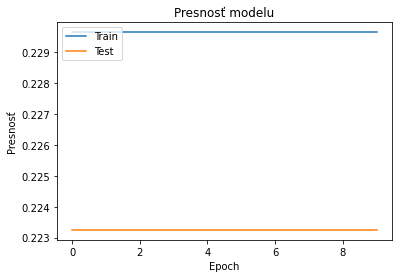

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Presnosť modelu")
plt.ylabel("Presnosť")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

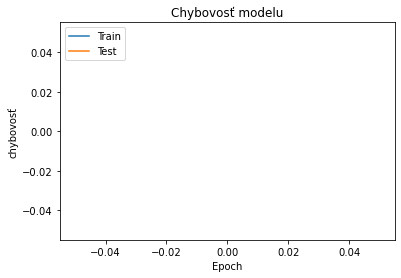

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chybovosť modelu')
plt.ylabel('chybovosť')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()